<a href="https://colab.research.google.com/github/giorgiobonetta/Personal-Project/blob/main/BSc_Thesis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import probplot
import statsmodels.api as stat
from scipy.integrate import quad
from scipy.stats import ks_2samp
import scipy.integrate as spi
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib import cm
from joblib import Parallel, delayed

In [ ]:
df_Forward=pd.read_csv('Svensson.CSV')
df_Forward=df_Forward.iloc[:, :32]

In [ ]:
df_Forward

,Date,Beta0,Beta1,Beta2,Beta3,Tau1,Tau2,0,1,2,...,15,16,17,18,19,20,21,22,23,24
0,1/2/2024,0.988688,3.113811,-3.607050,4.903049,2.110540,11.853639,28.80,30.572,30.549,...,32.796,31.696,31.741,31.531,31.757,32.176,32.022,33.592,34.722,34.717
1,2/1/2024,1.025462,3.131119,-2.888749,4.821188,1.783573,12.014543,28.55,28.991,29.408,...,31.887,31.687,31.826,31.831,31.931,32.095,33.570,34.695,34.715,34.040
2,3/1/2024,0.926104,3.110284,-2.488821,5.675460,2.519686,12.133567,25.50,25.809,25.940,...,28.725,28.737,28.882,29.017,29.293,30.878,31.898,32.019,31.499,30.544
3,4/3/2024,0.861403,3.121075,-2.604920,5.678223,2.486501,11.923519,27.50,27.340,27.470,...,30.241,30.316,30.496,30.590,32.098,33.186,33.029,32.579,31.479,28.580
4,5/1/2024,0.806752,3.087747,-3.059956,6.591672,3.131650,10.798680,28.50,28.730,28.911,...,32.582,32.737,32.862,34.227,35.077,35.131,34.791,33.046,28.648,26.695
5,6/3/2024,0.727974,3.050546,-3.238265,7.130600,3.452538,10.928026,36.10,36.014,36.243,...,37.123,37.313,38.533,39.378,39.443,39.234,37.274,31.863,29.928,29.413
6,7/1/2024,0.569957,2.981707,-5.260036,9.230261,4.395703,10.167986,33.00,33.485,34.546,...,36.855,37.930,38.710,39.002,38.652,36.942,32.217,30.397,30.041,30.176
7,8/1/2024,0.393062,3.064270,-6.085638,9.398970,4.080465,9.932895,36.40,36.969,37.866,...,40.439,41.019,41.165,41.019,39.676,34.065,32.355,32.035,32.033,32.088
8,9/2/2024,0.490922,3.004934,-1.227178,6.768915,6.768915,11.834563,38.63,38.580,40.327,...,41.065,41.271,41.116,39.571,33.996,32.256,31.921,31.966,32.026,32.311
9,10/1/2024,0.545046,2.889661,1.236820,5.999390,0.500029,13.222843,38.88,39.273,39.804,...,39.454,39.434,37.884,33.656,31.681,31.181,31.312,31.350,31.444,31.317


In [ ]:
Spot=df_Forward.iloc[:,7]
spot=df_Forward.iloc[:,7].values
Fwd = df_Forward.iloc[:, 8:].values
maturities_month = df_Forward.columns[8:].astype(float)
maturities = df_Forward.columns[8:].astype(float)/12
dates = pd.to_datetime(df_Forward.iloc[:, 0]).dt.strftime('%d/%m/%Y')
beta0=df_Forward.iloc[:,1]
beta1=df_Forward.iloc[:,2]
beta2=df_Forward.iloc[:,3]
beta3=df_Forward.iloc[:,4]
tau1=df_Forward.iloc[:,5]
tau2=df_Forward.iloc[:,6]
T=np.arange(1,25)/12

<>:25: SyntaxWarning: invalid escape sequence '\{'
<>:25: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipython-input-288016899.py:25: SyntaxWarning: invalid escape sequence '\{'
  cbar.set_label('Prezzi Forward $\{F(t,T_{i})\}_{i}$', rotation=270, labelpad=20)
/tmp/ipython-input-288016899.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


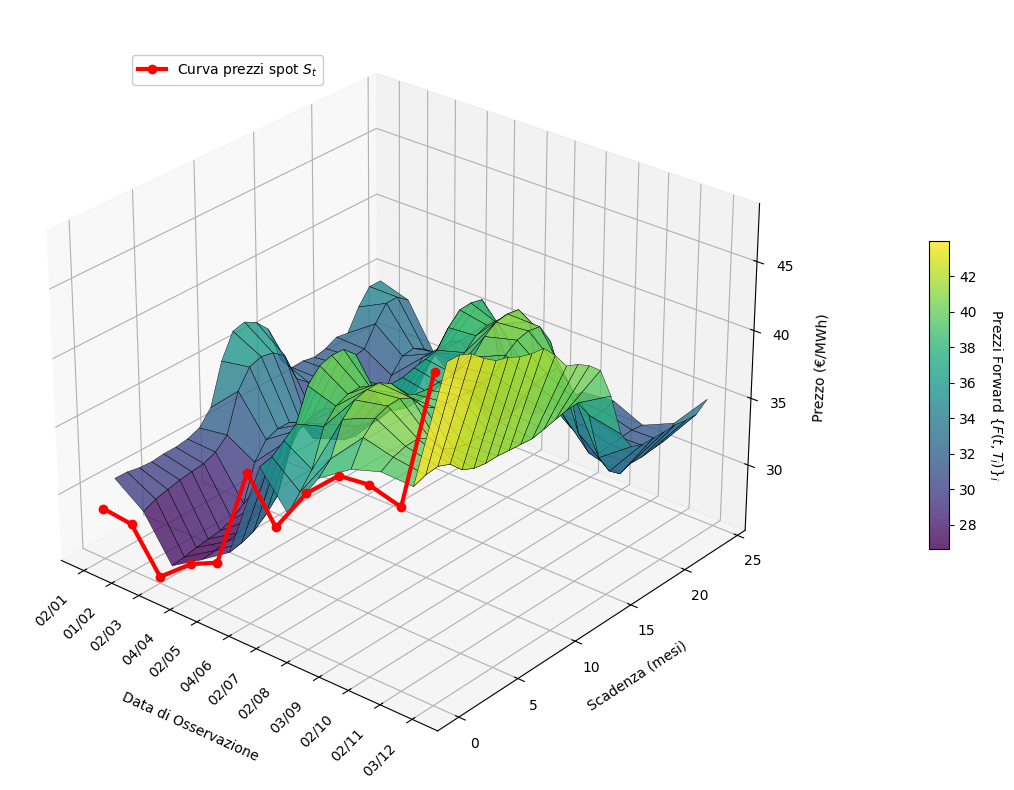

In [ ]:
date_values = pd.to_datetime(df_Forward.iloc[:, 0])
dates = date_values.map(lambda x: x.toordinal())

X, Y = np.meshgrid(dates, maturities_month, indexing="ij")

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Fwd, cmap='viridis',edgecolor='k',linewidth=0.3,alpha=0.8)
ax.plot(dates, np.zeros_like(dates), Spot,color='red',linewidth=3,marker='o',markersize=6,label='Curva prezzi spot $S_{t}$',zorder=10)

ax.set_xlabel('Data di Osservazione', labelpad=25)
ax.set_ylabel('Scadenza (mesi)', labelpad=8)
ax.set_zlabel('Prezzo (€/MWh)', labelpad=8)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.set_xticks(dates)

ax.view_init(elev=28, azim=-50)
ax.grid(True, linestyle=':', alpha=0.5)

ax.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95), framealpha=1)
cbar = fig.colorbar(surf, shrink=0.4, aspect=15, pad=0.12)
cbar.set_label('Prezzi Forward $\{F(t,T_{i})\}_{i}$', rotation=270, labelpad=20)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

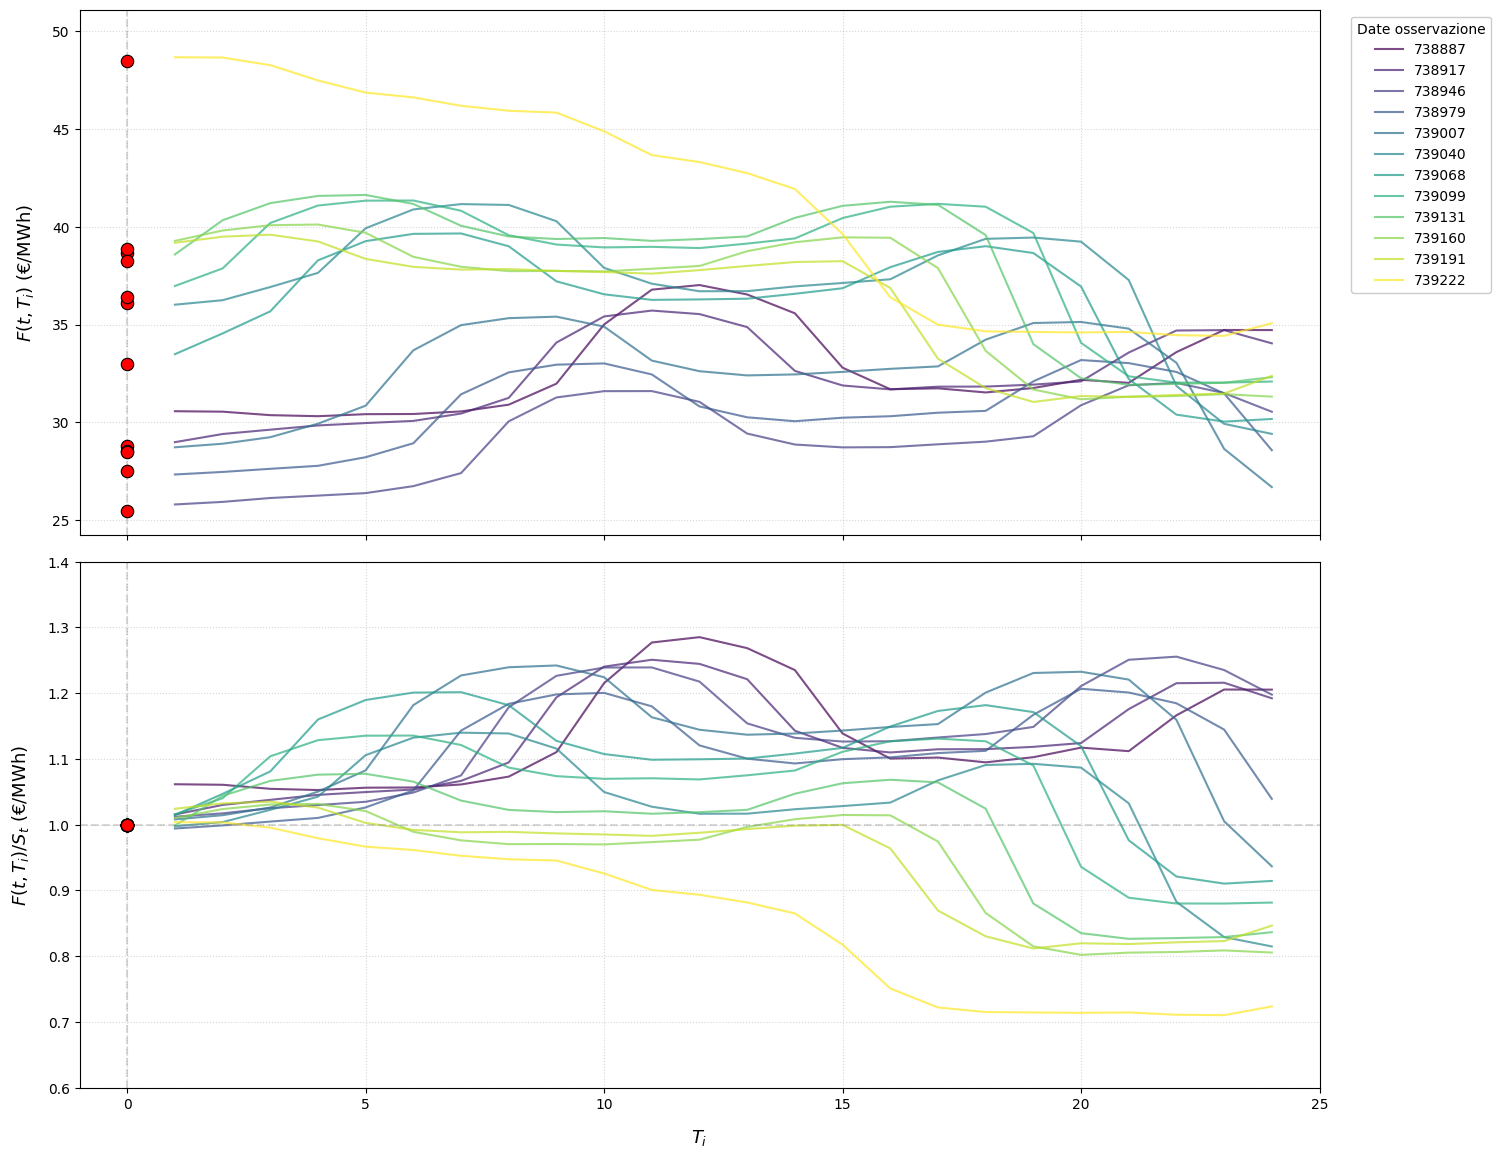

In [ ]:
normalized_prices = Fwd / spot[:, np.newaxis]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=True)
plt.subplots_adjust(hspace=0.05)

cmap = cm.viridis
colors = cmap(np.linspace(0, 1, len(Fwd)))

for i in range(len(Fwd)):
    ax1.plot(maturities_month, Fwd[i],color=colors[i],linewidth=1.5,alpha=0.7,label=dates[i])

    ax1.scatter(0, Spot[i],color='red',edgecolor='k', linewidth=0.8,s=80,zorder=10)

ax1.set_ylabel('$F(t,T_i)$ (€/MWh)', fontsize=13, labelpad=12)
ax1.grid(True, linestyle=':', alpha=0.5)
ax1.axvline(0, color='gray', linestyle='--', alpha=0.3)
ax1.set_ylim(min(Fwd.min(), Spot.min())*0.95, max(Fwd.max(), Spot.max())*1.05)

for i in range(len(normalized_prices)):
    ax2.plot(maturities_month, normalized_prices[i], color=colors[i],linewidth=1.5,alpha=0.7)

    ax2.scatter(0, 1,color='red',edgecolor='k',linewidth=0.8,s=80,zorder=10)

ax2.set_xlabel('$T_i$', fontsize=13, labelpad=12)
ax2.set_ylabel('$F(t,T_i)/S_{t}$ (€/MWh)', fontsize=13, labelpad=12)
ax2.grid(True, linestyle=':', alpha=0.5)
ax2.axhline(1, color='gray', linestyle='--', alpha=0.3)
ax2.axvline(0, color='gray', linestyle='--', alpha=0.3)
ax2.set_ylim(0.6, 1.4)

ax1.set_xlim(-1, max(maturities_month)+1)
ax2.set_xlim(-1, max(maturities_month)+1)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper left',bbox_to_anchor=(1.02, 1),framealpha=1,title="Date osservazione",fontsize=10)

plt.show()

In [ ]:
t = np.arange(1, 25)/12
df_rates = pd.DataFrame(index=df_Forward.index, columns=t)

for idx, row in df_Forward.iterrows():
    b0 = row['Beta0']
    b1 = row['Beta1']
    b2 = row['Beta2']
    b3 = row['Beta3']
    tau1 = row['Tau1']
    tau2 = row['Tau2']

    r_t = (b0 + b1 * np.exp(-t/tau1) + b2 * (t/tau1) * np.exp(-t/tau1) + b3 * (t/tau2) * np.exp(-t/tau2))/100
    df_rates.loc[idx] = r_t

df_rates = df_rates.astype(float)
df_rates

,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,0.833333,...,1.250000,1.333333,1.416667,1.500000,1.583333,1.666667,1.750000,1.833333,1.916667,2.000000
0,0.038793,0.036708,0.034764,0.032952,0.031265,0.029697,0.028241,0.026890,0.025640,0.024484,...,0.019946,0.019255,0.018626,0.018057,0.017543,0.017081,0.016668,0.016302,0.015978,0.015695
1,0.039181,0.036973,0.034934,0.033051,0.031315,0.029717,0.028249,0.026901,0.025667,0.024539,...,0.020265,0.019644,0.019088,0.018593,0.018156,0.017772,0.017438,0.017149,0.016903,0.016697
2,0.038943,0.037601,0.036335,0.035142,0.034018,0.032960,0.031965,0.031031,0.030154,0.029331,...,0.025956,0.025413,0.024909,0.024442,0.024010,0.023612,0.023246,0.022911,0.022604,0.022325
3,0.038346,0.036951,0.035637,0.034399,0.033234,0.032139,0.031110,0.030145,0.029241,0.028394,...,0.024932,0.024378,0.023864,0.023390,0.022952,0.022550,0.022181,0.021843,0.021536,0.021257
4,0.037846,0.036802,0.035812,0.034872,0.033981,0.033138,0.032340,0.031585,0.030872,0.030200,...,0.027385,0.026922,0.026488,0.026084,0.025707,0.025356,0.025031,0.024730,0.024453,0.024197
5,0.036834,0.035929,0.035068,0.034249,0.033470,0.032732,0.032031,0.031366,0.030737,0.030142,...,0.027631,0.027214,0.026823,0.026456,0.026114,0.025795,0.025497,0.025221,0.024965,0.024729
6,0.034729,0.033975,0.033256,0.032570,0.031916,0.031292,0.030698,0.030134,0.029597,0.029087,...,0.026916,0.026551,0.026208,0.025885,0.025583,0.025299,0.025035,0.024788,0.024559,0.024347
7,0.033518,0.032512,0.031552,0.030638,0.029769,0.028941,0.028155,0.027409,0.026702,0.026031,...,0.023194,0.022721,0.022278,0.021862,0.021474,0.021111,0.020774,0.020460,0.020171,0.019903
8,0.034915,0.034873,0.034832,0.034793,0.034755,0.034718,0.034683,0.034649,0.034616,0.034584,...,0.034440,0.034414,0.034389,0.034365,0.034341,0.034319,0.034296,0.034275,0.034254,0.034234
9,0.032032,0.029857,0.027841,0.025995,0.024321,0.022816,0.021475,0.020291,0.019254,0.018352,...,0.015521,0.015220,0.014986,0.014813,0.014692,0.014619,0.014586,0.014590,0.014625,0.014687


In [ ]:
tassi_immediati=df_rates.iloc[:,0]

In [ ]:
data = {'Date': df_Forward.iloc[:,0],'Spot': df_Forward.iloc[:,7],'F(T)': df_Forward.iloc[:,8],'r':  tassi_immediati}

df = pd.DataFrame(data)

df['Convenience_Yield'] = df['r'] - 12*np.log(df['F(T)'] / df['Spot'])
conv_yield=df['Convenience_Yield'].values

In [ ]:
df_unificato = pd.DataFrame({
    'Data di Osservazione': df_Forward.iloc[:,0],
    'Tasso interesse istantaneo': tassi_immediati,
    'Convenience Yield istantaneo': conv_yield})

print(df_unificato.to_string())

   Data di Osservazione  Tasso interesse istantaneo  Convenience Yield istantaneo
0              1/2/2024                    0.038793                     -0.677717
1              2/1/2024                    0.039181                     -0.144761
2              3/1/2024                    0.038943                     -0.105595
3              4/3/2024                    0.038346                      0.108368
4              5/1/2024                    0.037846                     -0.058607
5              6/3/2024                    0.036834                      0.065456
6              7/1/2024                    0.034729                     -0.140352
7              8/1/2024                    0.033518                     -0.152613
8              9/2/2024                    0.034915                      0.050457
9             10/1/2024                    0.032032                     -0.088656
10            11/1/2024                    0.029021                     -0.257722
11            12

In [ ]:
num_observations = 12
r = tassi_immediati
delta0 = conv_yield
obs_fwd = df_Forward.iloc[:,8:].values
dates = pd.to_datetime(df_Forward.iloc[:, 0]).dt.strftime('%d/%m/%Y')
spot=df_Forward.iloc[:,7].values

# GS Model

In [ ]:
def A_GS(T, r_i, theta, sigma_s):
    return (r_i - theta - 0.5 * sigma_s**2) * T

def B_GS(T, delta0_i, theta, kappa):
    return (delta0_i - theta) * (1 - np.exp(-kappa * T)) / kappa

def C2_GS(T, sigma_x, sigma_s, rho_sx, kappa):
    term1 = (sigma_x**2 / (2 * kappa**3)) * (2 * kappa * T - 3 + 4 * np.exp(-kappa * T) - np.exp(-2 * kappa * T))
    term2 = sigma_s**2 * T
    term3 = (2 * sigma_x * sigma_s * rho_sx / (kappa**2)) * (1 - np.exp(-kappa * T) - kappa * T * np.exp(-kappa * T))
    return term1 + term2 + term3

def future_price_GS(S_0, T, r_i, theta, kappa, sigma_s, sigma_x, rho_sx, delta0_i):
    A_val = A_GS(T, r_i, theta, sigma_s)
    B_val = B_GS(T, delta0_i, theta, kappa)
    C2_val = C2_GS(T, sigma_x, sigma_s, rho_sx, kappa)
    return S_0 * np.exp(A_val - B_val + 0.5 * C2_val)

def error_function_GS(params, S_0, T, obs_fwd, r_i):
    theta, kappa, sigma_s, sigma_x, rho_sx = params
    predicted = [future_price_GS(S_0, T, r_i, theta, kappa, sigma_s, sigma_x, rho_sx, delta0_i)]
    return np.sqrt(np.mean((obs_fwd - predicted)**2))

In [ ]:
maturities = np.arange(1, 25)/12
dates = pd.to_datetime(df_Forward.iloc[:, 0]).dt.strftime('%d/%m/%Y')

results_GS = []
calibrated_params_list = []
forward_price_GS = []

bnds = [(-0.1, 10), (0.01, 10), (0, 2), (0, 2), (-1, 1)]

# Calibration
for i in range(num_observations):
    S_0 = Spot[i]
    observed_futures = obs_fwd[i]
    r_i = r[i]
    delta0_i = delta0[i]

    best_params = None
    best_error = float('inf')

    for _ in range(20):
        initial_guess = [np.random.uniform(b[0], b[1]) for b in bnds]
        result_GS = minimize(error_function_GS, initial_guess, args=(S_0, maturities, observed_futures, r_i), bounds=bnds)

        if result_GS.fun < best_error:
            best_error = result_GS.fun
            best_params = result_GS.x

    calibrated_params_list.append(best_params)
    theoretical = [future_price_GS(S_0, T, r_i, *best_params, delta0_i) for T in maturities]
    forward_price_GS.append(theoretical)

    results_GS.append({'Spot': S_0, 'Params': best_params, 'RMSE': best_error, 'Observed_GS': observed_futures, 'Theoretical': theoretical, 'Date': dates[i]})

forward_price_data = []

for i, res in enumerate(forward_price_GS):
    row = {'Date': dates[i]}
    row.update({f'Maturity_{j+1}': res[j] for j in range(len(res))})
    forward_price_data.append(row)

df_GS = pd.DataFrame(forward_price_data)

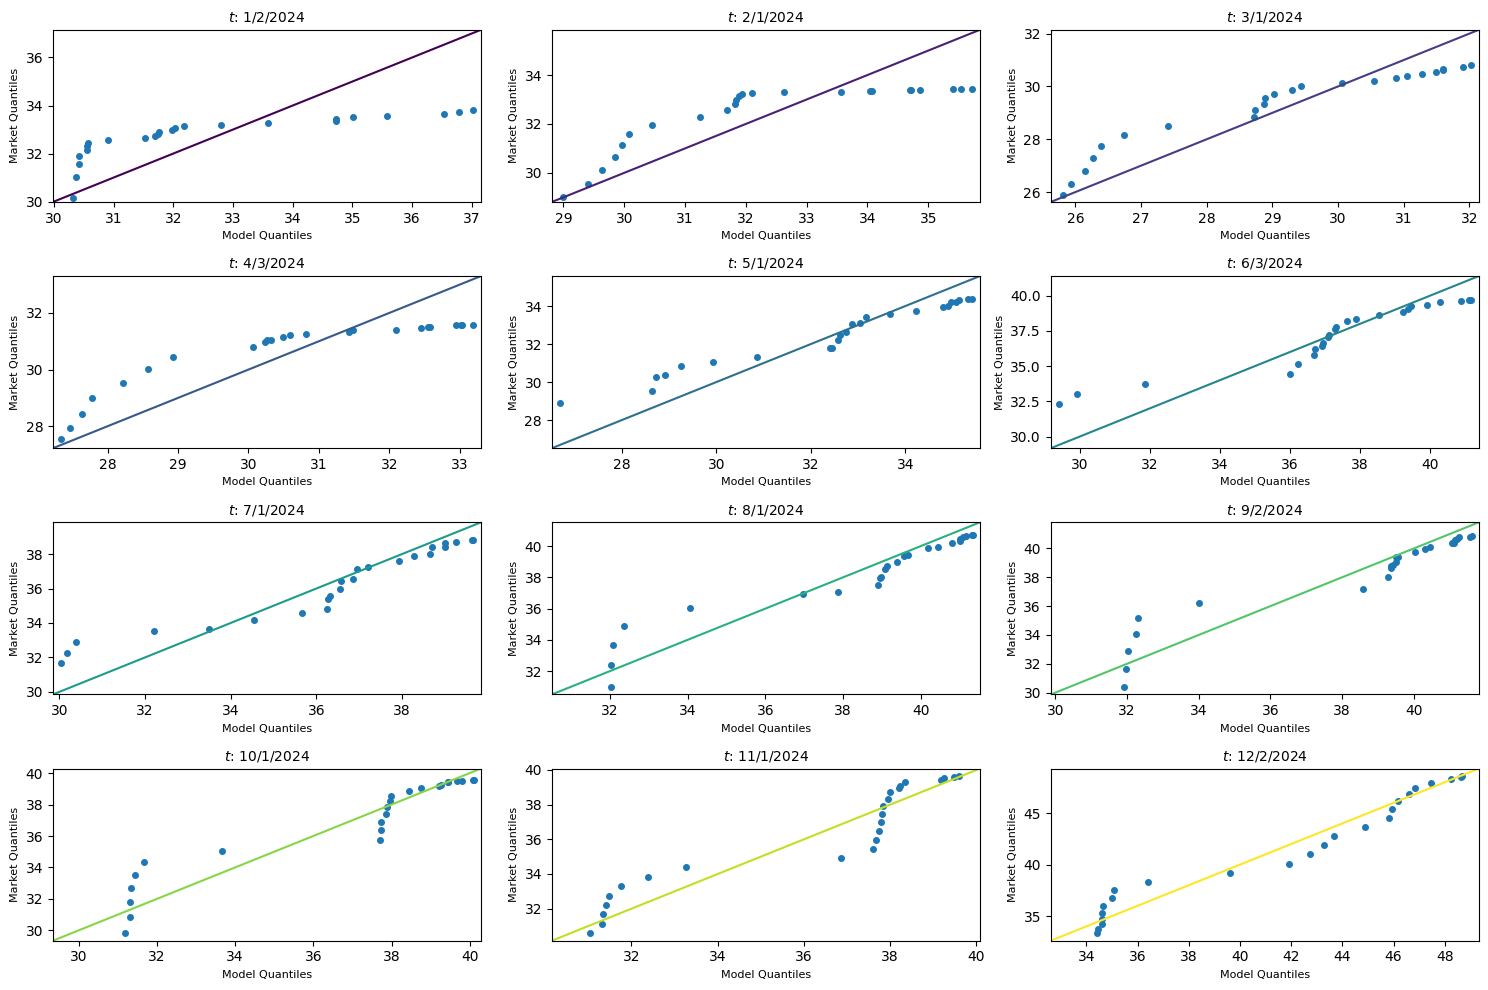

In [ ]:
mkt_fwd_price = df_Forward.iloc[:,8:]
fwd_GS = df_GS.iloc[:,1:]

import statsmodels.api as sm
num_observations = len(mkt_fwd_price)
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.ravel()
cmap = cm.viridis
colors = cmap(np.linspace(0, 1, num_observations))

for i in range(num_observations):
    obs = mkt_fwd_price.iloc[i].values
    GS = fwd_GS.iloc[i].values

    sm.qqplot_2samples(obs, GS, line='45', ax=axes[i])
    axes[i].set_title(f"$t$: {df_Forward.iloc[i, 0]}", fontsize=10)
    axes[i].set_xlabel("Model Quantiles", fontsize=8)
    axes[i].set_ylabel("Market Quantiles", fontsize=8)

    for child in axes[i].get_children():
        if isinstance(child, plt.Line2D):
            child.set_color(colors[i])
            child.set_markersize(4)

plt.tight_layout()
plt.show()

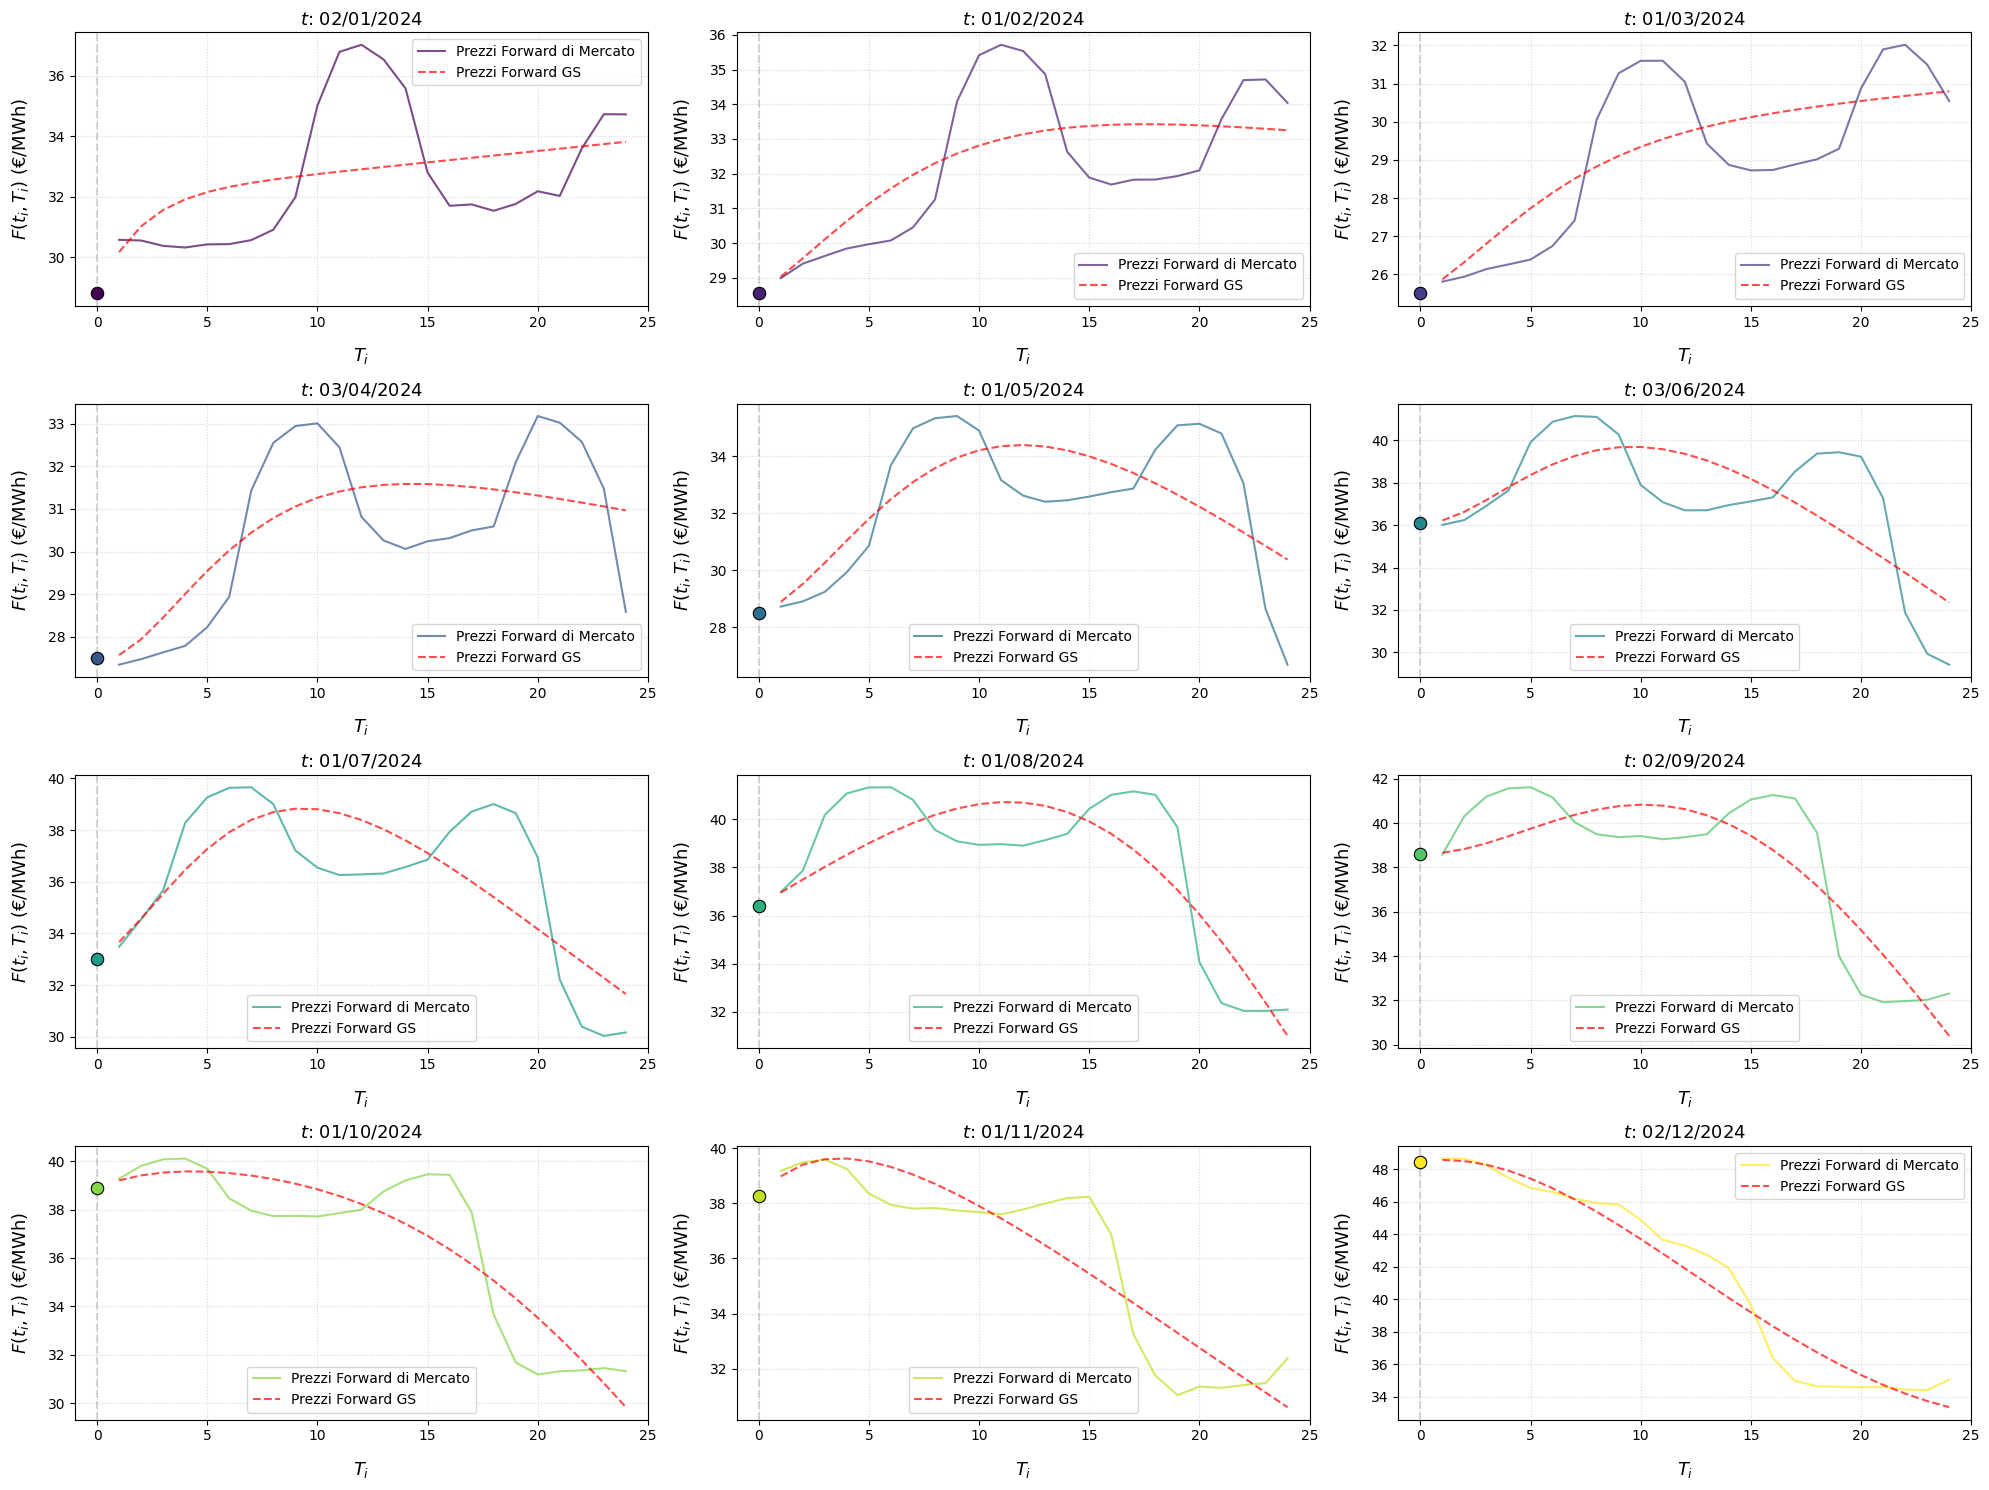

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()
cmap = cm.viridis
colors = cmap(np.linspace(0, 1, num_observations))

for i, res in enumerate(results_GS):
    ax = axes[i]
    obs_line, = ax.plot(maturities_month, res['Observed_GS'], color=colors[i], linewidth=1.5, alpha=0.7, label='Prezzi Forward di Mercato')
    theo_line, = ax.plot(maturities_month, res['Theoretical'], 'r--', linewidth=1.5, alpha=0.7, label='Prezzi Forward GS')
    ax.legend()
    ax.scatter(0, res['Spot'], color=colors[i], edgecolor='k', linewidth=0.8, s=80, zorder=10)
    ax.set_title(f'$t$: {res["Date"]}', fontsize=13)
    ax.set_xlabel('$T_i$', fontsize=13, labelpad=12)
    ax.set_ylabel('$F(t_i,T_i)$ (€/MWh)', fontsize=13, labelpad=12)
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axvline(0, color='gray', linestyle='--', alpha=0.3)
    ax.set_xlim(-1, max(maturities_month) + 1)

handles, labels = ax.get_legend_handles_labels()

plt.tight_layout()
#plt.show()

parametri = []
for i, res in enumerate(results_GS):
    parametri.append({'Data': res['Date'],'θ': f"{res['Params'][0]:.4f}",'κ': f"{res['Params'][1]:.4f}",'σ_s': f"{res['Params'][2]:.4f}",
        'σ_x': f"{res['Params'][3]:.4f}",'ρ_sx': f"{res['Params'][4]:.4f}",'RMSE': f"{res['RMSE']:.4f}"})

df = pd.DataFrame(parametri)

# Stochastic Convinience Yield model

In [ ]:
beta0 = df_Forward.iloc[:,1]
beta1 = df_Forward.iloc[:,2]
beta2 = df_Forward.iloc[:,3]
beta3 = df_Forward.iloc[:,4]
tau1 = df_Forward.iloc[:,5]
tau2 = df_Forward.iloc[:,6]
num_observations = 12
r = tassi_immediati
delta0 = conv_yield
obs_fwd = df_Forward.iloc[:,8:].values
dates = pd.to_datetime(df_Forward.iloc[:, 0]).dt.strftime('%d/%m/%Y')

In [ ]:
def B_function(T, kappa):
    return (1 - np.exp(-kappa * T)) / kappa

def yield_curve(T, beta0, beta1, beta2, beta3, tau1, tau2):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-T / tau1)) / (T / tau1))
    term3 = beta2 * (((1 - np.exp(-T / tau1)) / (T / tau1)) - np.exp(-T / tau1))
    term4 = beta3 * (((1 - np.exp(-T / tau2)) / (T / tau2)) - np.exp(-T / tau2))
    return (term1 + term2 + term3 + term4) / (T*100)

def forward_price(S_0, T, params, beta0, beta1, beta2, beta3, tau1, tau2):
    sigma_s, kappa, theta, sigma_x, rho_sx, a, b, c, delta0 = params
    B = B_function(T, kappa)
    y_T = yield_curve(T, beta0, beta1, beta2, beta3, tau1, tau2)
    x_0 = delta0 - a * np.cos(c)

    zeta = y_T * (T) - ((a / b) * (np.sin(b * T + c) - np.sin(c))) - (x_0 * B)
    phi = (sigma_x**2 / (4 * (kappa**3))) * (-3 + 4 * np.exp(-kappa * T) - np.exp(-2 * kappa * T) + 2 * kappa * T)
    omega = ((kappa * theta + sigma_s * sigma_x * rho_sx) / kappa) * (B - T)

    return S_0 * np.exp(zeta + phi + omega)

def error_function(params, S_0, T, observed_prices, beta0, beta1, beta2, beta3, tau1, tau2):
    predicted = np.array(forward_price(S_0,T, params, beta0, beta1, beta2, beta3, tau1, tau2))
    return np.mean((observed_prices - predicted)**2)

num_observations = 12

bnds = [(0.01, 6), (0.01, 20), (-5, 5), (0.01, 6), (-1, 1), (-12, 12), (-12, 12), (-12, 12), (-5, 5)]

results_sCY = []
calibrated_params_list = []
forward_price_sCY = []

for i in range(num_observations):
    S_0 = Spot[i]
    obs_fwd_i = Fwd[i]
    r_i = r[i]
    beta0_i = beta0[i]
    beta1_i = beta1[i]
    beta2_i = beta2[i]
    beta3_i = beta3[i]
    tau1_i = tau1[i]
    tau2_i = tau2[i]

    best_params = None
    best_error = float('inf')

    for _ in range(20):
        initial_guess = [np.random.uniform(b[0], b[1]) for b in bnds]
        result_sCY = minimize(error_function, initial_guess, args=(S_0, maturities, obs_fwd_i, beta0_i, beta1_i, beta2_i, beta3_i, tau1_i, tau2_i), bounds=bnds)

        if result_sCY.fun < best_error:
            best_error = result_sCY.fun
            best_params = result_sCY.x

    calibrated_params_list.append(best_params)
    theoretical = np.array(forward_price(S_0, T, best_params, beta0_i, beta1_i, beta2_i, beta3_i, tau1_i, tau2_i))
    forward_price_sCY.append(theoretical)

    results_sCY.append({'Spot': S_0, 'Params': best_params, 'RMSE': np.sqrt(best_error), 'Observed_sCY': obs_fwd_i, 'Theoretical': theoretical, 'Date': dates[i]})

forward_price_data = []

for i, res in enumerate(forward_price_sCY):
    row = {'Date': dates[i]}
    row.update({f'Maturity_{j+1}': res[j] for j in range(len(res))})
    forward_price_data.append(row)

df_sCY = pd.DataFrame(forward_price_data)

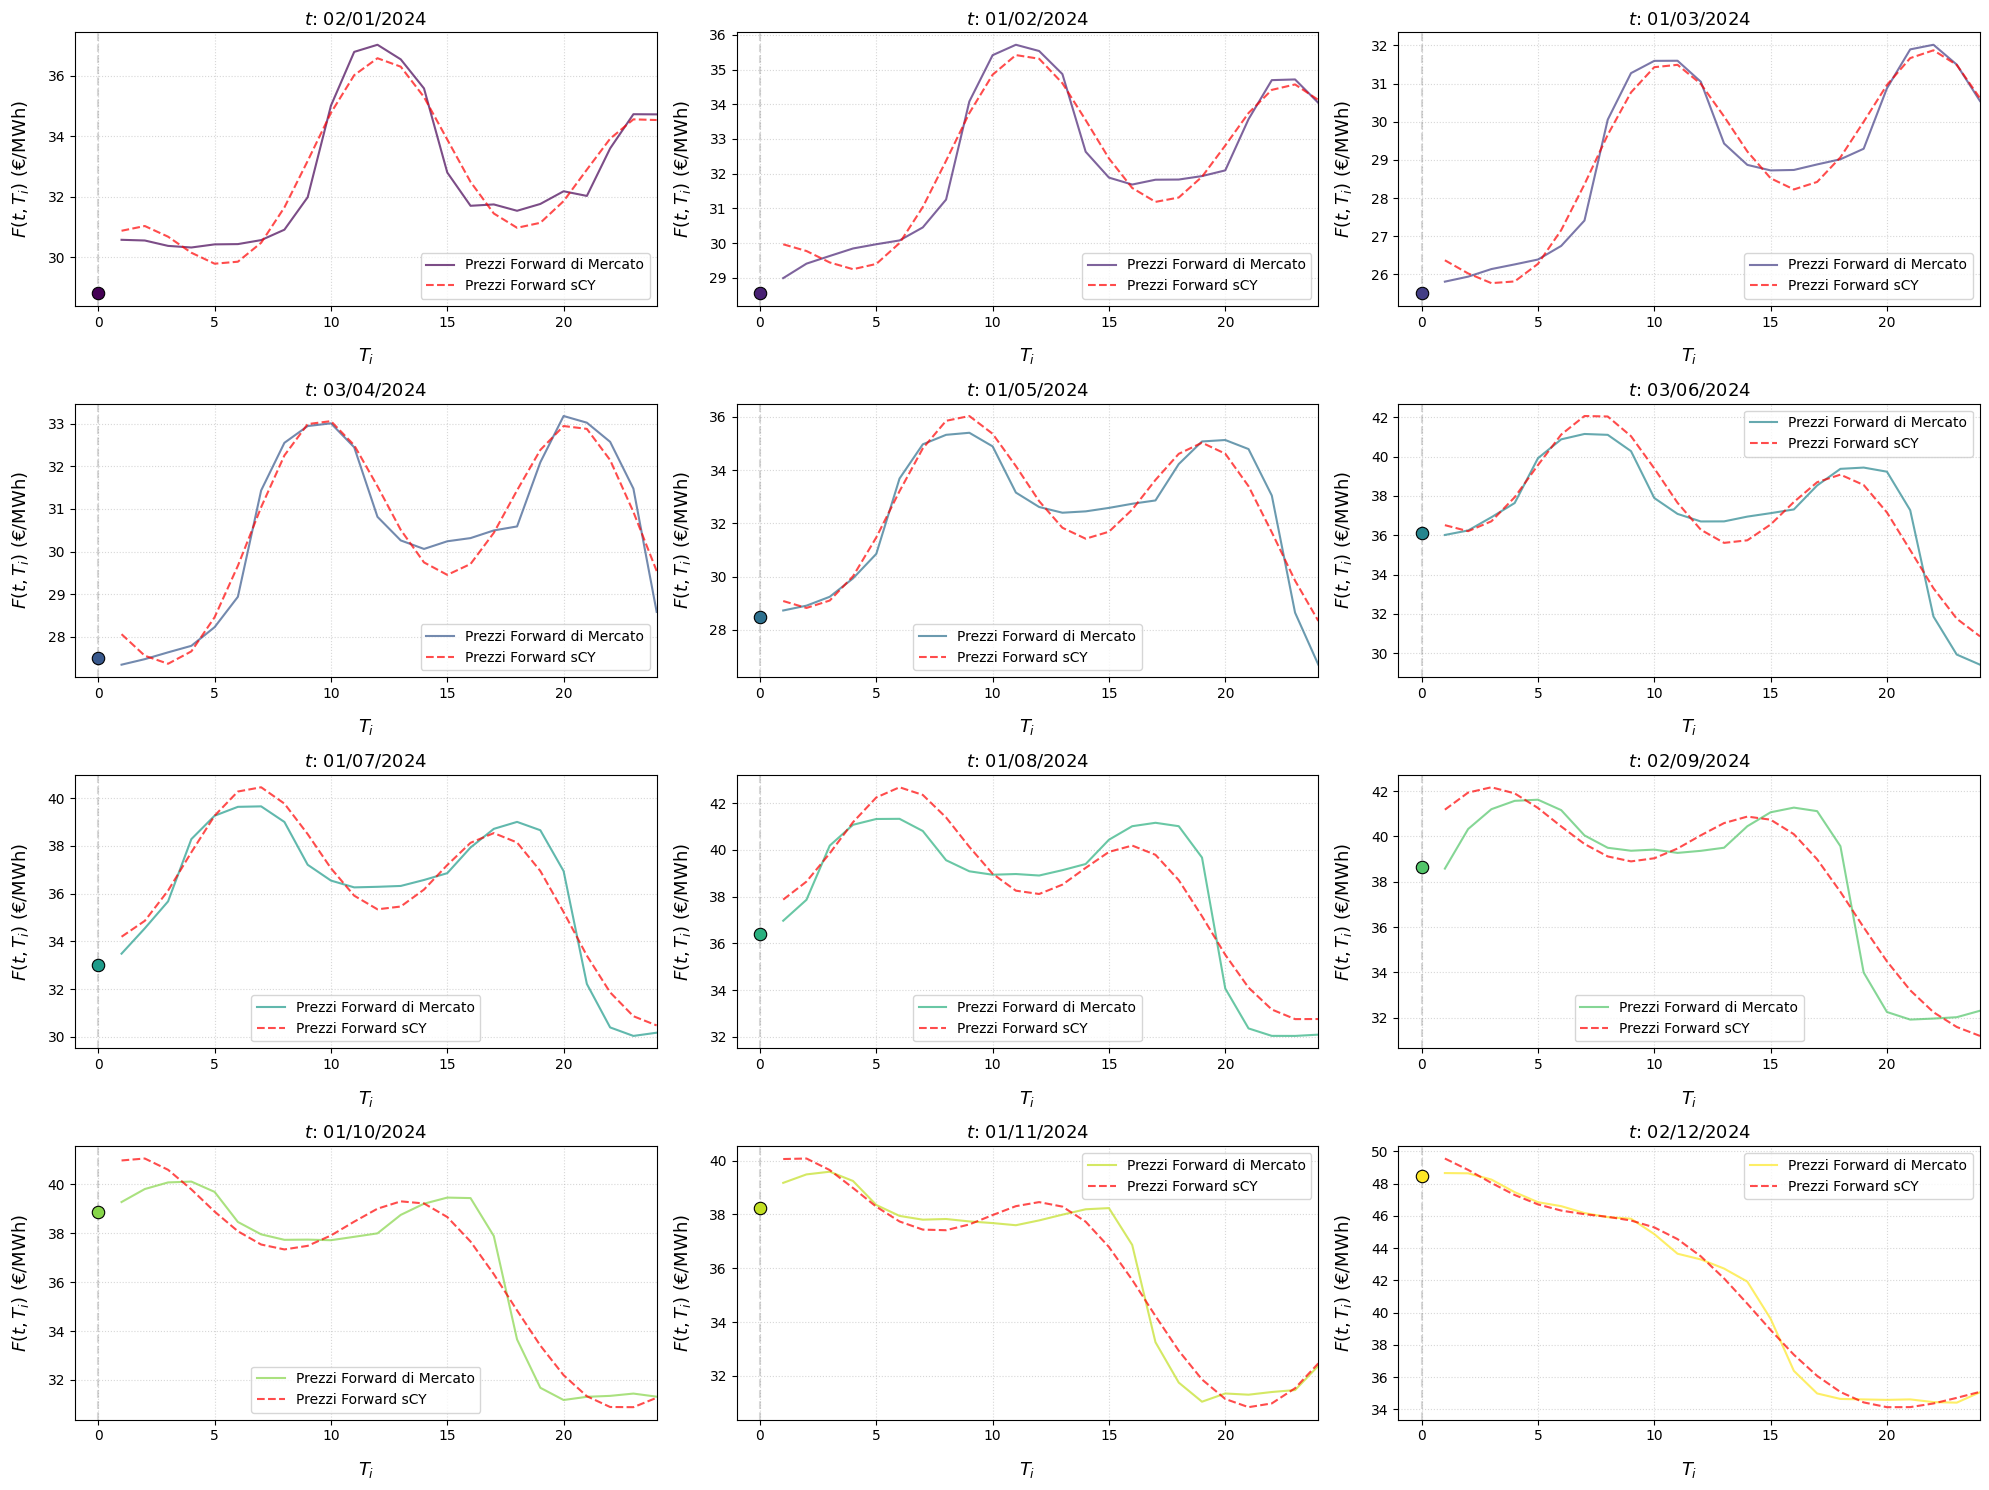

          Data     σ_s       κ        θ     σ_x    ρ_sx        a        b  \
0   02/01/2024  3.9690  0.0100   2.5137  0.5152  0.2423   0.4910  -6.4057   
1   01/02/2024  3.7153  0.0100  -0.1300  0.4815  0.2461   0.4087   6.3310   
2   01/03/2024  5.6793  0.0595   1.0171  0.3793  0.1107  -0.4172  -6.4145   
3   03/04/2024  6.0000  0.0100  -0.2214  0.0283  0.9853  -0.4393  -6.6062   
4   01/05/2024  5.2860  0.0414   5.0000  0.0100  0.9918  -0.5041   6.7822   
5   03/06/2024  5.9297  0.0100   5.0000  0.0175  1.0000   0.5007  -6.8936   
6   01/07/2024  6.0000  0.0100   5.0000  0.0255  1.0000   0.4480   6.8356   
7   01/08/2024  5.0618  0.0101   5.0000  0.0325  0.8715  -0.3500   7.0743   
8   02/09/2024  6.0000  0.0100   4.8092  0.0343  1.0000   0.2790   5.7441   
9   01/10/2024  1.5865  0.0100   0.4669  0.7461  0.6070   0.3330  -5.2695   
10  01/11/2024  1.0420  0.0100   0.7347  0.9349  1.0000  -0.2951   5.3387   
11  02/12/2024  5.8693  0.0180  -0.4650  0.8746  0.1601  -0.2012   5.4885   

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.ravel()
cmap = cm.viridis
colors = cmap(np.linspace(0, 1, num_observations))

for i, res in enumerate(results_sCY):
    ax = axes[i]
    obs_line, = ax.plot(maturities_month, res['Observed_sCY'], color=colors[i], linewidth=1.5, alpha=0.7, label='Prezzi Forward di Mercato')
    theo_line, = ax.plot(maturities_month, res['Theoretical'], 'r--', linewidth=1.5, alpha=0.7, label='Prezzi Forward sCY')
    ax.legend()
    ax.scatter(0, res['Spot'], color=colors[i], edgecolor='k', linewidth=0.8, s=80, zorder=10)
    ax.set_title(f'$t$: {res["Date"]}', fontsize=13)
    ax.set_xlabel('$T_i$', fontsize=13, labelpad=12)
    ax.set_ylabel('$F(t,T_i)$ (€/MWh)', fontsize=13, labelpad=12)
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.axvline(0, color='gray', linestyle='--', alpha=0.3)
    ax.set_xlim(-1, max(maturities) + 1)

handles, labels = ax.get_legend_handles_labels()

plt.tight_layout()
plt.show()

parametri = []
for i, res in enumerate(results_sCY):
    parametri.append({'Data': res['Date'],'σ_s': f"{res['Params'][0]:.4f}",'κ': f"{res['Params'][1]:.4f}",'θ': f"{res['Params'][2]:.4f}",
                    'σ_x': f"{res['Params'][3]:.4f}",'ρ_sx': f"{res['Params'][4]:.4f}",'a': f"{res['Params'][5]:.4f}",'b': f"{res['Params'][6]:.4f}",
        'c': f"{res['Params'][7]:.4f}",'δ_0': f"{res['Params'][8]:.4f}",'RMSE': f"{res['RMSE']:.4f}"})

df = pd.DataFrame(parametri)
print(df)

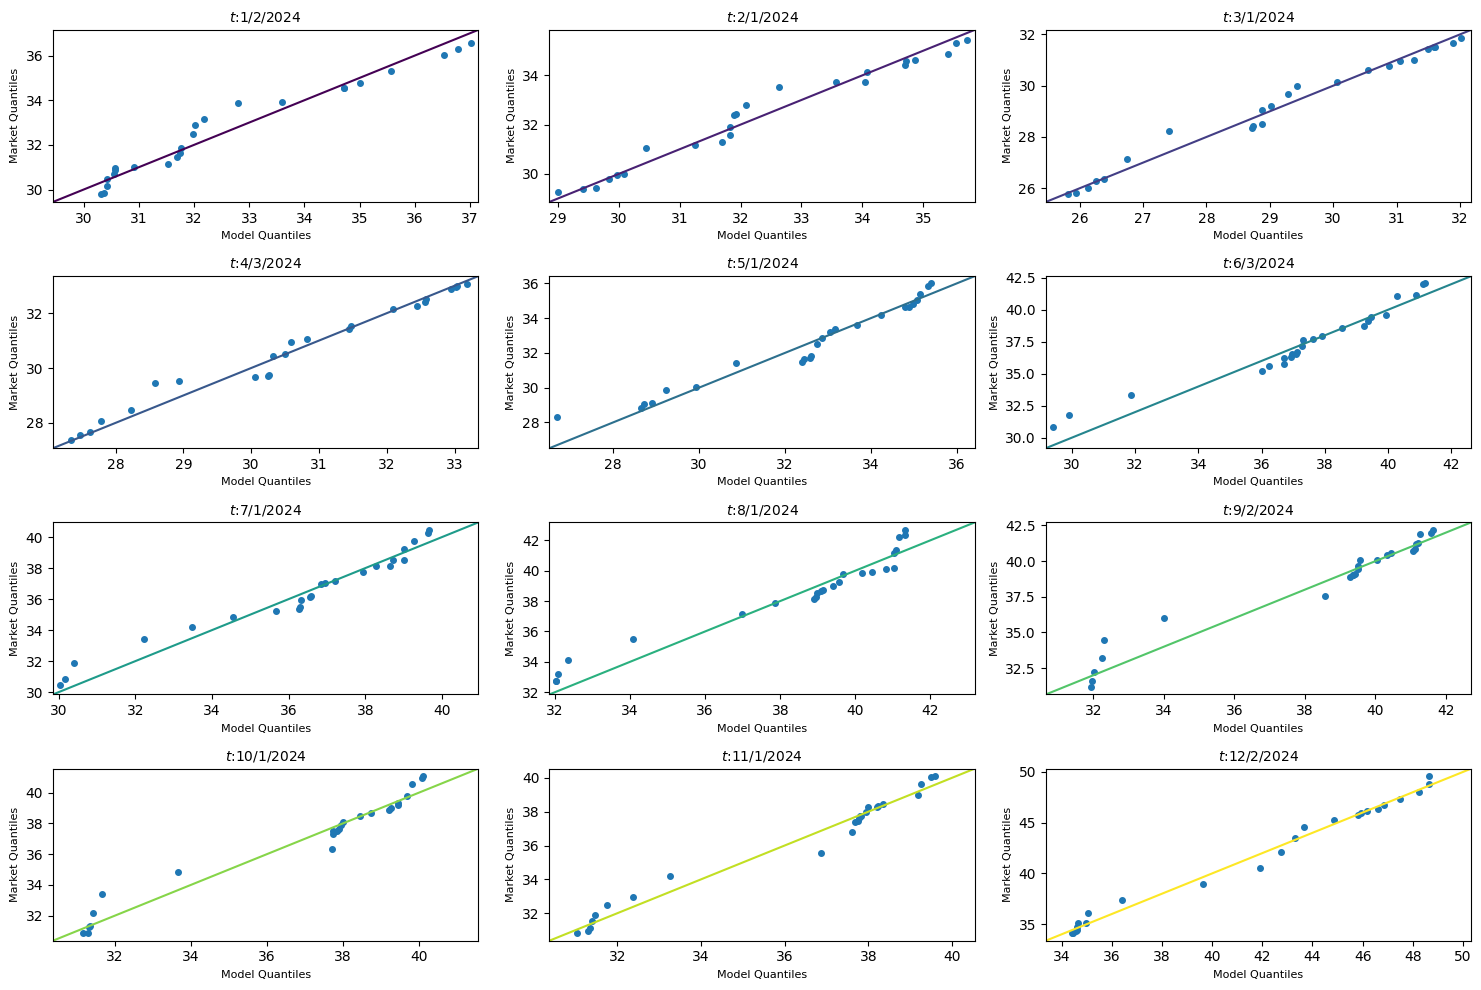

In [ ]:
fwd_sCY = df_sCY.iloc[:,1:]
df_Forward.reset_index(drop=True, inplace=True)
df_sCY.reset_index(drop=True, inplace=True)

num_observations = len(mkt_fwd_price)
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.ravel()
cmap = cm.viridis
colors = cmap(np.linspace(0, 1, num_observations))

for i in range(num_observations):
    obs = mkt_fwd_price.iloc[i].values
    sCY = fwd_sCY.iloc[i].values

    sm.qqplot_2samples(obs, sCY, line='45', ax=axes[i])
    axes[i].set_title(f"$t$:{df_Forward.iloc[i, 0]}", fontsize=10)
    axes[i].set_xlabel("Model Quantiles", fontsize=8)
    axes[i].set_ylabel("Market Quantiles", fontsize=8)

    for child in axes[i].get_children():
        if isinstance(child, plt.Line2D):
            child.set_color(colors[i])
            child.set_markersize(4)

plt.tight_layout()
plt.show()

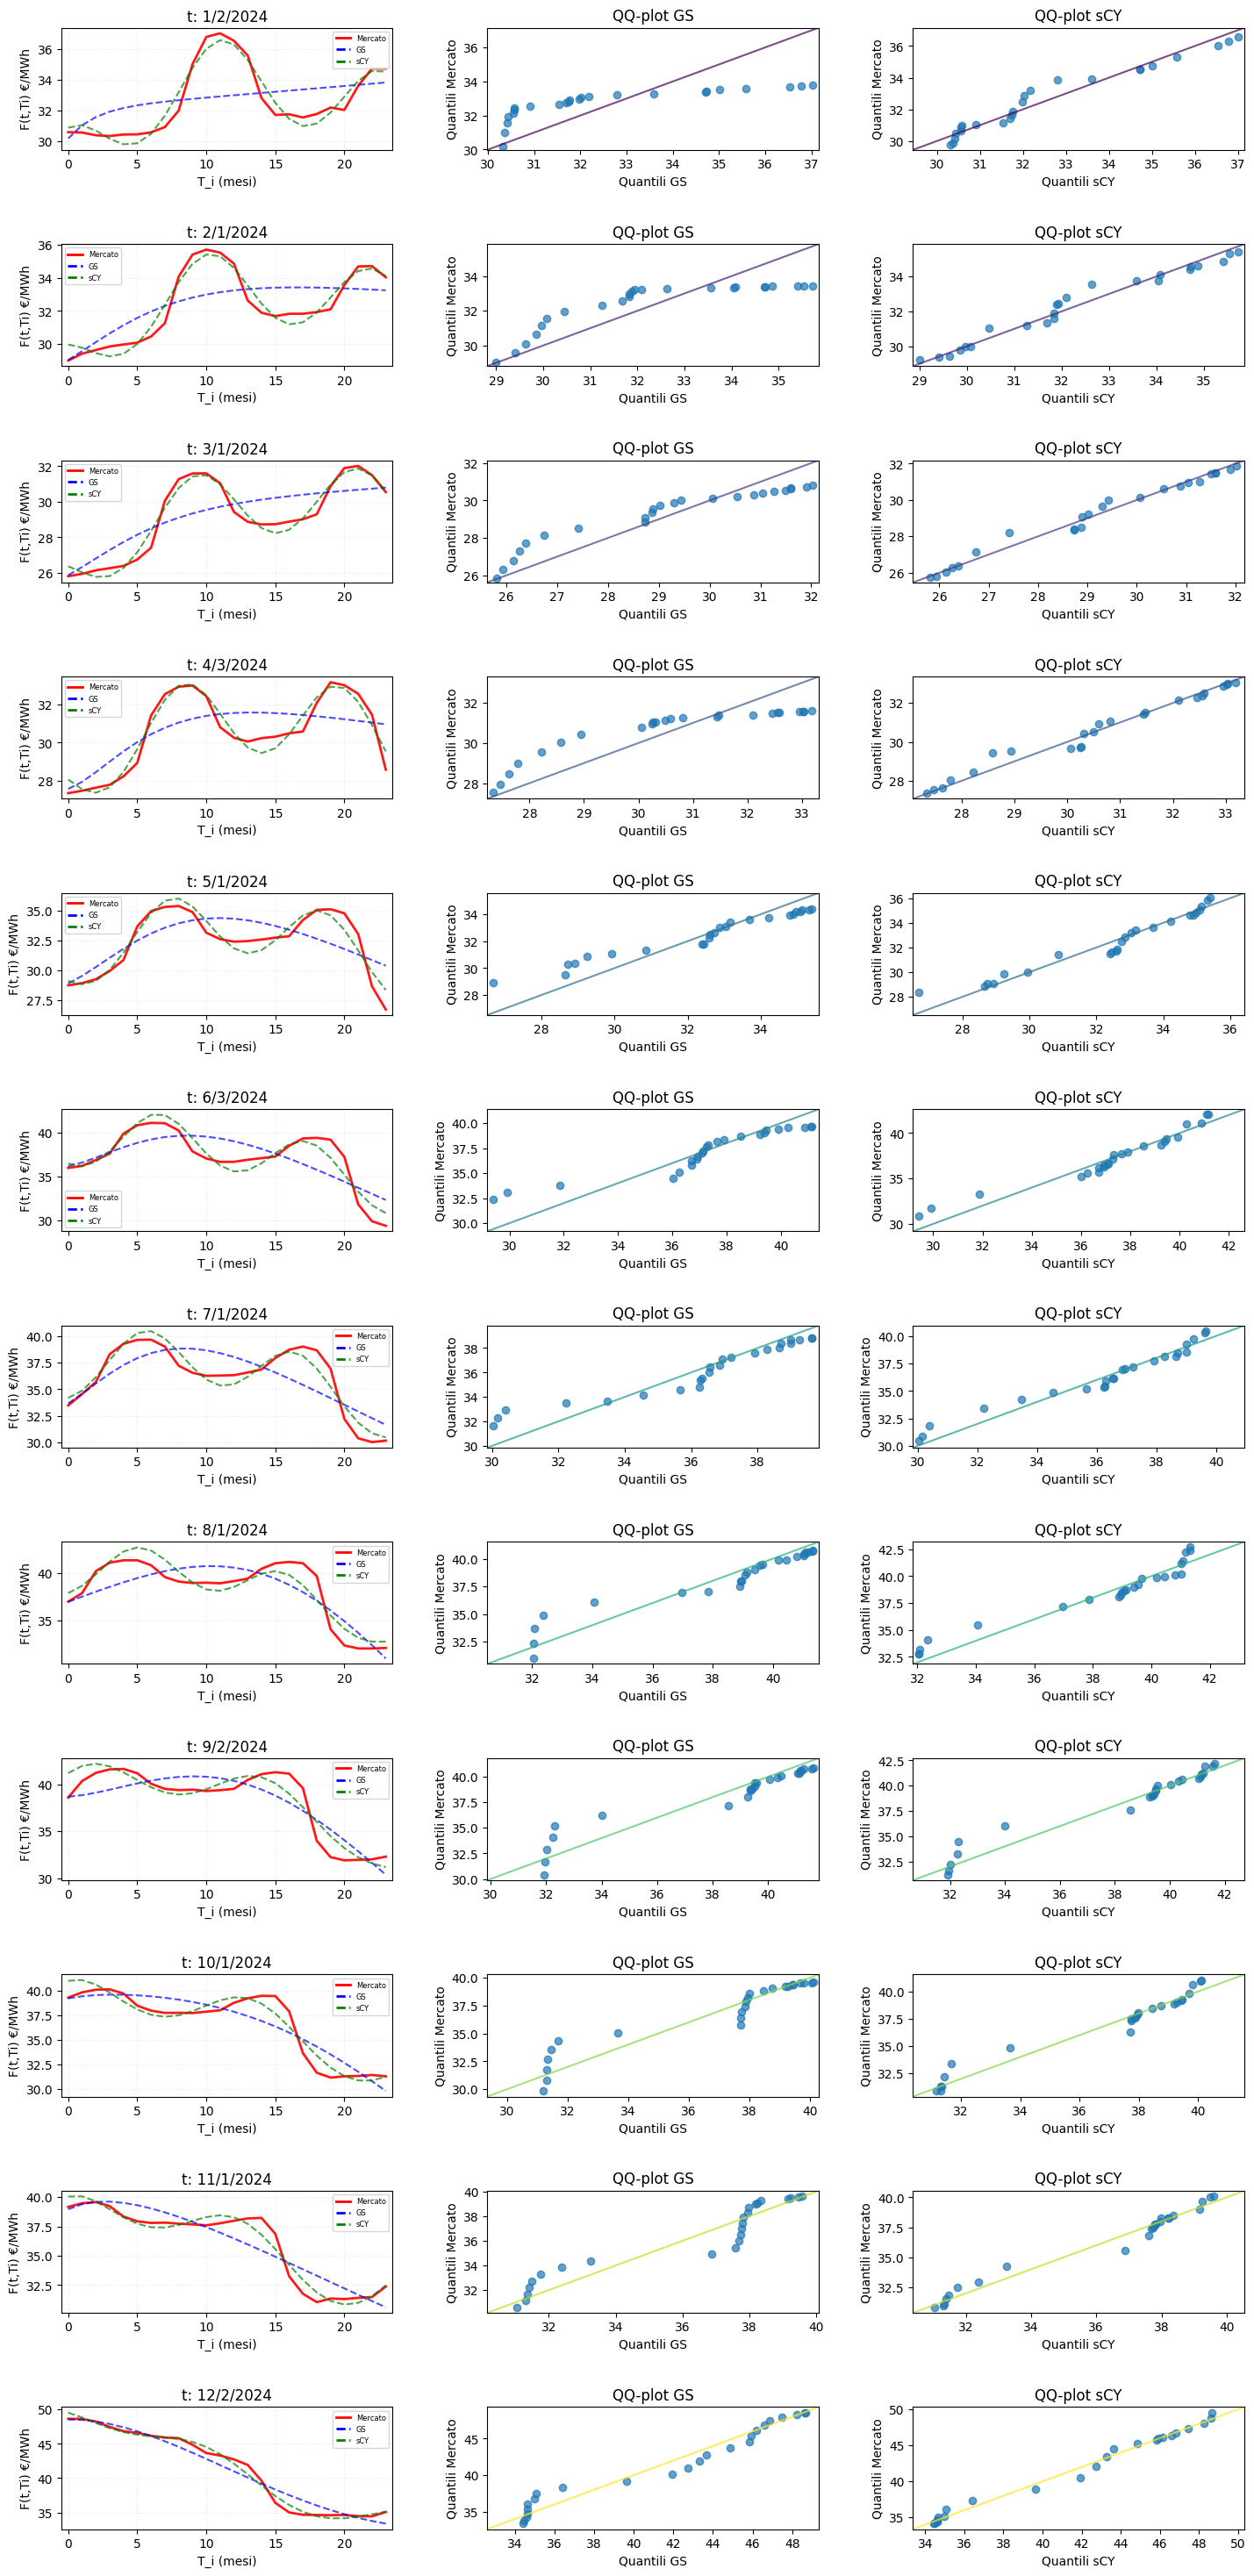

In [ ]:
df_Forward.reset_index(drop=True, inplace=True)
df_GS.reset_index(drop=True, inplace=True)
df_sCY.reset_index(drop=True, inplace=True)

mkt_fwd_price = df_Forward.iloc[:, 8:]
fwd_GS = df_GS.iloc[:, 1:]
fwd_sCY = df_sCY.iloc[:, 1:]
maturities = np.arange(len(mkt_fwd_price.columns))

num_dates = len(mkt_fwd_price)
fig, axes = plt.subplots(12, 3, figsize=(15, 30))

cmap = cm.viridis
colors = cmap(np.linspace(0, 1, num_dates))

curve_legend = [plt.Line2D([0], [0], color='red', linewidth=2, label='Mercato'),
    plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=2, label='GS'),
    plt.Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='sCY')]

for i in range(12):
    if i < num_dates:
        obs = mkt_fwd_price.iloc[i].values
        GS = fwd_GS.iloc[i].values
        sCY = fwd_sCY.iloc[i].values
        date_label = df_Forward.iloc[i, 0]

        ax1 = axes[i, 0]
        ax1.plot(maturities, obs, 'r-', linewidth=2, alpha=0.9, label='Mercato')
        ax1.plot(maturities, GS, 'b--', linewidth=1.5, alpha=0.7, label='GS')
        ax1.plot(maturities, sCY, 'g--', linewidth=1.5, alpha=0.7, label='sCY')
        ax1.set_title(f't: {date_label}', fontsize=12)
        ax1.set_xlabel('T_i (mesi)', fontsize=10)
        ax1.set_ylabel('F(t,Ti) €/MWh', fontsize=10)
        ax1.legend(handles=curve_legend, fontsize=6)
        ax1.grid(True, linestyle=':', alpha=0.3)
        ax1.set_xlim(-0.5, max(maturities)+0.5)

        ax2 = axes[i, 1]
        sm.qqplot_2samples(obs, GS, line='45', ax=ax2)
        ax2.set_title(f'QQ-plot GS', fontsize=12)
        ax2.set_xlabel("Quantili GS", fontsize=10)
        ax2.set_ylabel("Quantili Mercato", fontsize=10)

        ax3 = axes[i, 2]
        sm.qqplot_2samples(obs, sCY, line='45', ax=ax3)
        ax3.set_title(f'QQ-plot sCY', fontsize=12)
        ax3.set_xlabel("Quantili sCY", fontsize=10)
        ax3.set_ylabel("Quantili Mercato", fontsize=10)

        for ax in [ax2, ax3]:
            for child in ax.get_children():
                if isinstance(child, plt.Line2D):
                    if child.get_label() == '45':
                        child.set_color('red')
                        child.set_linewidth(2)
                    else:
                        child.set_color(colors[i])
                        child.set_markersize(6)
                        child.set_alpha(0.7)
    else:
        for j in range(3):
            axes[i,j].axis('off')

plt.tight_layout(pad=3.0)
plt.show()